In [1]:
import os
import cv2

os.chdir("/home/aneta/Desktop/TWM/project/face-morphing")

In [2]:
!pwd

/home/aneta/Desktop/TWM/project/face-morphing


In [3]:
import albumentations as A
import matplotlib.pyplot as plt

from scripts.training import augmentations as aug
from scripts.training import data_loading as dl

%load_ext autoreload
%autoreload 2

In [4]:
DATASET_PATH = os.path.join(os.getcwd(), "data", "dataset", "train")

In [5]:
def draw_keypoints(img, keypoints):
    img_with_keypoints = img.copy()
    for iter in range(1,int((len(keypoints)-1)/2)):
            x, y = round(keypoints[2*iter-1]), round(keypoints[2*iter])
            img_with_keypoints = cv2.circle(img_with_keypoints, (x, y), radius=4, color=(0,255,0), thickness=-1)
    return img_with_keypoints

In [6]:
def draw_formatted_keypoints(img, keypoints, dots_size = 5):
    img_with_keypoints = img.copy()
    
    for (x, y) in keypoints:
        img_with_keypoints = cv2.circle(img_with_keypoints, (int(x), int(y)), radius=dots_size, color=(0,255,0), thickness=-1)

    return img_with_keypoints

In [7]:
dataset = dl.HelenFaceMorphingDataset(
    dataset_root=DATASET_PATH,
)

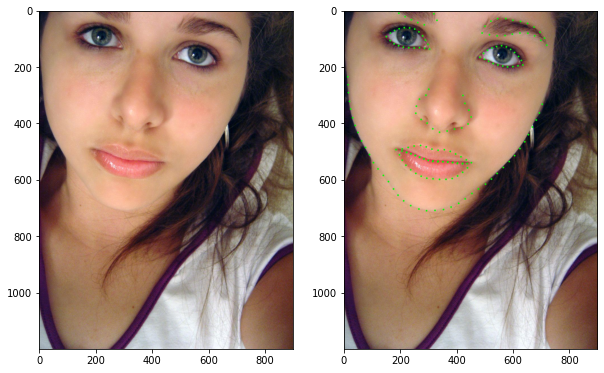

In [8]:
img, keypoints = dataset[359]

img_with_keypoints = draw_formatted_keypoints(img, keypoints, 3)
fig, axis = plt.subplots(1, 2, figsize=(10, 10))
axis[0].imshow(img)
axis[1].imshow(img_with_keypoints)

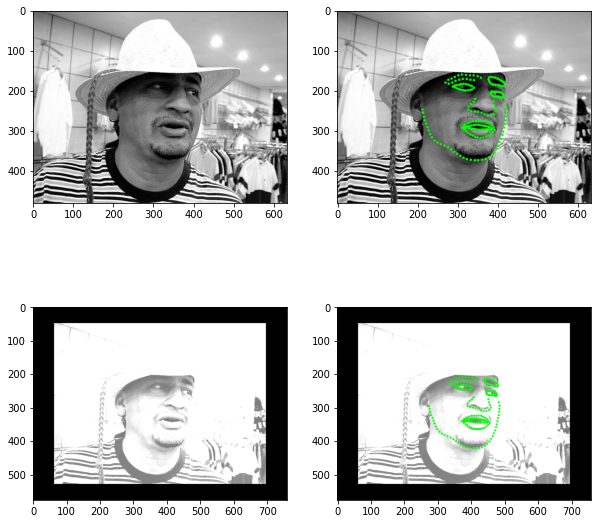

In [9]:
img, keypoints = dataset[48]

img_with_keypoints = draw_formatted_keypoints(img, keypoints, 3)

fig, axis = plt.subplots(2, 2, figsize=(10, 10))
axis[0, 0].imshow(img)
axis[0, 1].imshow(img_with_keypoints)

brightness = A.RandomBrightnessContrast(brightness_limit=0.5, p=1)
pad = A.CropAndPad(percent=0.1, keep_size=False, p=1)

transform = A.Compose(
    [
        brightness,
        pad,
    ],
    keypoint_params=A.KeypointParams(format='xy')
)

augmentation_result = transform(image=img, keypoints=keypoints)
augmentation_result_keypoint = draw_formatted_keypoints(augmentation_result['image'], augmentation_result['keypoints'], 3)
axis[1, 0].imshow(augmentation_result["image"])
axis[1, 1].imshow(augmentation_result_keypoint)


In [10]:
def draw_sample(index, dots_size = 5):
    fig, axis = plt.subplots(8, 4, figsize=(20, 30))

    for i in range(8):
        img, keypoints = dataset[index]
        img2, keypoints2 = dataset[index]

        img_with_keypoints = draw_formatted_keypoints(img, keypoints, dots_size)
        img_with_keypoints2 = draw_formatted_keypoints(img2, keypoints2,dots_size)
            
        axis[i, 0].imshow(img)
        axis[i, 1].imshow(img_with_keypoints)
        axis[i, 2].imshow(img2)
        axis[i, 3].imshow(img_with_keypoints2)



In [11]:
aug_pipeline = aug.AugmentationPipeline()

In [12]:
dataset = dl.HelenFaceMorphingDataset(
    dataset_root=DATASET_PATH, 
    augmentation_pipeline=aug_pipeline,
)

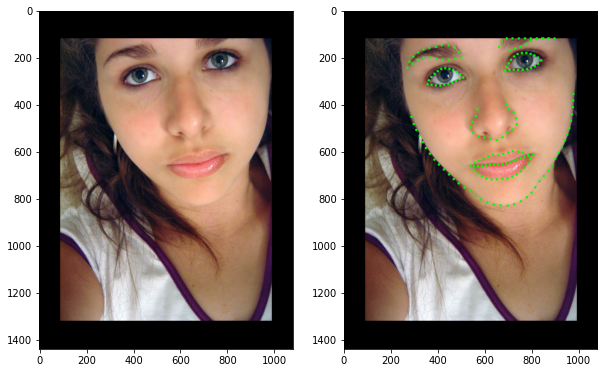

In [15]:
img, keypoints = dataset[359]
#359, 30

img_with_keypoints = draw_formatted_keypoints(img, keypoints, 5)
fig, axis = plt.subplots(1, 2, figsize=(10, 10))
axis[0].imshow(img)
axis[1].imshow(img_with_keypoints)

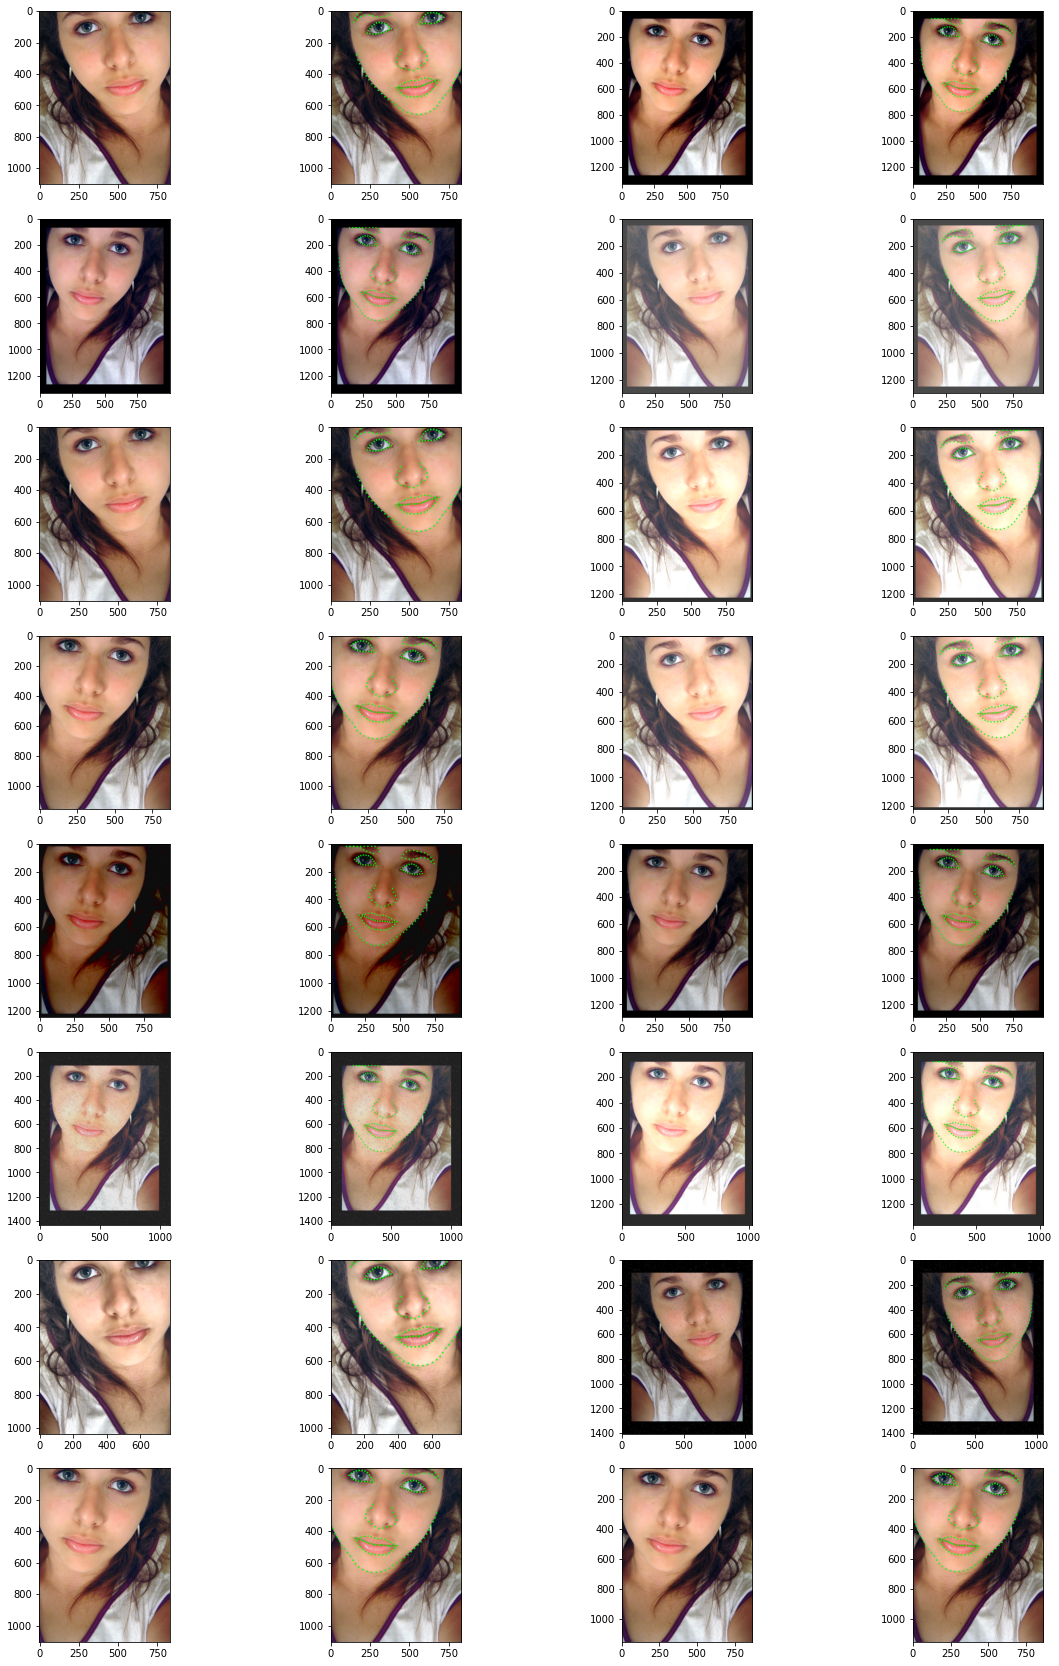

In [14]:
draw_sample(359, 5)